In [1]:
import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt 
import tensorflow as tf
FLAGS = None
import os
import numpy as np
from PIL import Image
import math
from skimage.color import rgb2gray


C:\Users\prach\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
def main(_):
    # Import data
    mnist = input_data.read_data_sets('./MNIST_Logistic', one_hot=True)

    # Create the model
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y = tf.matmul(x, W) + b

    # Define loss and optimizer
    y_ = tf.placeholder(tf.float32, [None, 10])

    # The raw formulation of cross-entropy,
    #
    #   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
    #                                 reduction_indices=[1]))
    #
    # can be numerically unstable.
    #
    # So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
    # outputs of 'y', and then average across the batch.
    cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
    #train_step = tf.train.AdagradOptimizer(0.9).minimize(cross_entropy)
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    error=[]
    # Train
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        if i%10 == 0:
            error.append(sess.run(cross_entropy, feed_dict={x: batch_xs, y_: batch_ys}))
      # Test trained model

    plt.plot(error)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Logistic Regression:")
    print("Logistic Regression Train Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

    path = "..\proj3_images\Test"
    path += "\\"
    arr = os.listdir(path)
    test_images = np.zeros((1500, 784))
    test_y_ = [] #tf.placeholder(tf.float32, [None, 10])
    i=0;
    for idx, filenames in enumerate(arr):
        if '.png' in filenames:
            label = filenames.split("_")[1]
            label = int(label.split(".")[0]) 
            ix = int(10 - math.ceil(label/150))
            image_labels = np.zeros((1,10))
            image_labels[0,ix] = 1 
            test_y_.append(image_labels)

            filenames = path+filenames
            img = Image.open(filenames)

            img = img.resize((28,28), Image.NEAREST)
            #img.mode = 'L'
            img = np.asarray(img, dtype=np.float32)
            img = rgb2gray(img)
            test_images[idx,0:784] = img.flatten()
            i+=1


    test_y_ = np.asarray(test_y_, dtype=np.float32)
    test_y_ = np.squeeze(test_y_)

    test_images = 1.0 - test_images / 255.0
    test_images = np.asarray(test_images, dtype=np.float32)    

    print("Logistic Regression USPS Test accuracy:", sess.run(accuracy, feed_dict={x: test_images,y_: test_y_}))
    
    path = "..\proj3_images\\Numerals"
    path += "\\"
    arr = os.listdir(path)
    test_images1 = np.zeros((19999, 784))
    test_y_1 = [] #tf.placeholder(tf.float32, [None, 10])
    i=0;
    for idx, label1 in enumerate(arr):
        image_path = path + "\\"
        image_path += label1
        image_path += "\\"
        arr1 = os.listdir(image_path)
        for filenames in arr1:
            if '.png' in filenames:
                image_labels = np.zeros((1,10))
                image_labels[0,idx] = 1 
                test_y_1.append(image_labels)
                filenames = image_path+filenames
                img = Image.open(filenames)
                img = img.resize((28,28), Image.NEAREST)
                img = np.asarray(img, dtype=np.float32)
                img = rgb2gray(img)
                test_images1[idx,0:784] = img.flatten()


    test_y_1 = np.asarray(test_y_1, dtype=np.float32)
    test_y_1 = np.squeeze(test_y_1)

    test_images1 = 1 - test_images1 / 255.0
    test_images1 = np.asarray(test_images1, dtype=np.float32)

    print("Logistic Regression Numerals Folder Test Accuracy:", sess.run(accuracy, feed_dict={x: test_images1, y_: test_y_1}))
    
    print('MLP:')

    #mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)
    # Create model
    # Add more hidden layers to create deeper networks
    # Remember to connect the final hidden layer to the out_layer
    def create_multilayer_perceptron():
        # Network Parameters
        n_hidden_1 = 40  # 1st layer number of features
        n_input = 784  # data input
        n_classes = 10

        # Store layers weight & bias
        weights = {
            'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
            'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
        }
        biases = {
            'b1': tf.Variable(tf.random_normal([n_hidden_1])),
            'out': tf.Variable(tf.random_normal([n_classes]))
        }
        # tf Graph input
        x = tf.placeholder("float32", [None, n_input])
        y = tf.placeholder("float32", [None, n_classes])


        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)

        # Output layer with linear activation
        out_ = tf.matmul(layer_1, weights['out']) + biases['out']
        out_layer = tf.nn.softmax(out_)
        return out_layer,x,y



    # Parameters
    learning_rate = 0.01
    training_epochs = 50
    batch_size = 100

    # Construct model
    pred,x,y = create_multilayer_perceptron()

    # Define loss and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    error=[]
    # Training cycle
    for epoch in range(training_epochs):
            avg_cost = 0.
            # Loop over all batches
            for i in range(1000):
                batch_x, batch_y = mnist.train.next_batch(100)
                # Run optimization op (backprop) and cost op (to get loss value)
                sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
                error.append(cost)

    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("MLP test Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    print("MLP USPS Test Accuracy:" , sess.run(accuracy, feed_dict={x: test_images, y: test_y_}))
    print("MLP Numerals folder test Accuracy:", sess.run(accuracy, feed_dict={x: test_images1, y: test_y_1}))
    
    print("CNN:")
    def deepnn(x):
      """deepnn builds the graph for a deep net for classifying digits.
      Args:
        x: an input tensor with the dimensions (N_examples, 784), where 784 is the
        number of pixels in a standard MNIST image.
      Returns:
        A tuple (y, keep_prob). y is a tensor of shape (N_examples, 10), with values
        equal to the logits of classifying the digit into one of 10 classes (the
        digits 0-9). keep_prob is a scalar placeholder for the probability of
        dropout.
      """
      # Reshape to use within a convolutional neural net.
      # Last dimension is for "features" - there is only one here, since images are
      # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
      with tf.name_scope('reshape'):
        x_image = tf.reshape(x, [-1, 28, 28, 1])

      # First convolutional layer - maps one grayscale image to 32 feature maps.
      with tf.name_scope('conv1'):
        W_conv1 = weight_variable([5, 5, 1, 32])
        b_conv1 = bias_variable([32])
        h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

      # Pooling layer - downsamples by 2X.
      with tf.name_scope('pool1'):
        h_pool1 = max_pool_2x2(h_conv1)

      # Second convolutional layer -- maps 32 feature maps to 64.
      with tf.name_scope('conv2'):
        W_conv2 = weight_variable([5, 5, 32, 64])
        b_conv2 = bias_variable([64])
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

      # Second pooling layer.
      with tf.name_scope('pool2'):
        h_pool2 = max_pool_2x2(h_conv2)

      # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
      # is down to 7x7x64 feature maps -- maps this to 1024 features.
      with tf.name_scope('fc1'):
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
        b_fc1 = bias_variable([1024])

        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

      # Dropout - controls the complexity of the model, prevents co-adaptation of
      # features.
      with tf.name_scope('dropout'):
        keep_prob = tf.placeholder(tf.float32)
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

      # Map the 1024 features to 10 classes, one for each digit
      with tf.name_scope('fc2'):
        W_fc2 = weight_variable([1024, 10])
        b_fc2 = bias_variable([10])

        y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
      return y_conv, keep_prob


    def conv2d(x, W):
      """conv2d returns a 2d convolution layer with full stride."""
      return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


    def max_pool_2x2(x):
      """max_pool_2x2 downsamples a feature map by 2X."""
      return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                            strides=[1, 2, 2, 1], padding='SAME')


    def weight_variable(shape):
      """weight_variable generates a weight variable of a given shape."""
      initial = tf.truncated_normal(shape, stddev=0.1)
      return tf.Variable(initial)


    def bias_variable(shape):
      """bias_variable generates a bias variable of a given shape."""
      initial = tf.constant(0.1, shape=shape)
      return tf.Variable(initial)


    # Import data
    # Create the model
    x = tf.placeholder(tf.float32, [None, 784])

    # Define loss and optimizer
    y_ = tf.placeholder(tf.float32, [None, 10])

    # Build the graph for the deep net
    y_conv, keep_prob = deepnn(x)

    with tf.name_scope('loss'):
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_,
                                                                logits=y_conv)
        cross_entropy = tf.reduce_mean(cross_entropy)

    with tf.name_scope('adam_optimizer'):
        train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float32)
        accuracy = tf.reduce_mean(correct_prediction)

    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
      # sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = sess.run(accuracy, feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            #print('step %d, training accuracy %g' % (i, train_accuracy))
        sess.run(train_step, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('CNN test accuracy for mnist %g' % sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
    print("CNN USPS Test Accuracy:", sess.run(accuracy, feed_dict={x: test_images, y_: test_y_, keep_prob: 1.0}))
    print("CNN Numerals Folder Test Accuracy", sess.run(accuracy, feed_dict={x: test_images1,y_: test_y_1, keep_prob : 1.0}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_Logistic\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_Logistic\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./MNIST_Logistic\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./MNIST_Logistic\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as offi

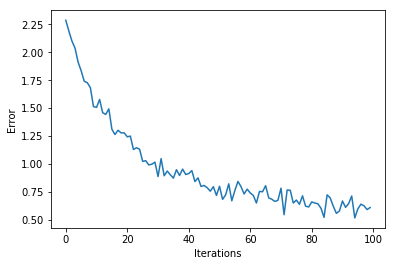

Logistic Regression:
Logistic Regression Train Accuracy: 0.8712
Logistic Regression USPS Test accuracy: 0.29666665
Logistic Regression Numerals Folder Test Accuracy: 0.099955
MLP:
MLP test Accuracy: 0.7759
MLP USPS Test Accuracy: 0.332
MLP Numerals folder test Accuracy: 0.100005
CNN:
CNN test accuracy for mnist 0.9932
CNN USPS Test Accuracy: 0.7
CNN Numerals Folder Test Accuracy 0.100005


SystemExit: 

C:\Users\prach\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  parser.add_argument('--data_dir', type=str, default='/tmp/tensorflow/mnist/input_data',
                      help='Directory for storing input data')
  FLAGS, unparsed = parser.parse_known_args()
  tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)